In [7]:
#Plot a bubble chart to analyze the relationship between app size (in MB) and average rating, with the bubble size representing the number of installs. Include a filter to show only apps with a rating higher than 3.5 and that belong to the "Games" category and installs should be more than 50k as well as this graph should work between 12 PM to 4 PM

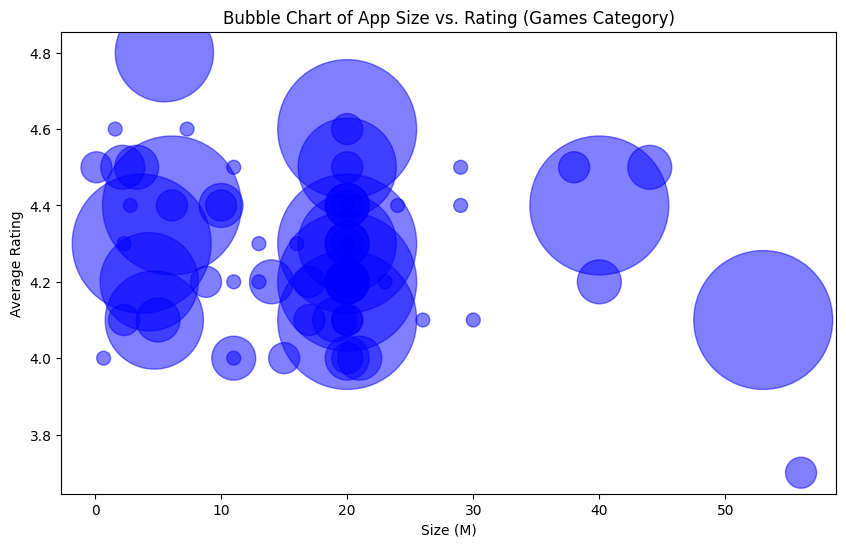

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Read the data from the CSV file
data = pd.read_csv('data22.csv')

# Ensure 'Installs' column is cleaned of non-numeric characters (like '+' and ',')
data['Installs'] = data['Installs'].replace({'+': '', ',': ''}, regex=True)

# Handle missing or non-numeric values by filling them with 0 or dropping them
# Drop rows with NaN in 'Installs' column
data = data.dropna(subset=['Installs'])

# Convert 'Installs' column to integer
data['Installs'] = data['Installs'].astype(int)

# Convert the 'Size' column into megabytes if needed, assuming it's in string format
# Handle the case where size can be in 'k' for KB or 'M' for MB, etc.
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1024  # convert KB to MB
    return None  # Return None for missing or invalid size

data['Size_M'] = data['Size'].apply(convert_size)

# Filter the data based on the conditions
filtered_data = data[(data['Rating'] > 3.5) &
                     (data['Category'] == 'Games') &
                     (data['Installs'] > 50000) &
                     (~data['Size_M'].isna())]  # Ensure Size is not NaN

# Get the current time
current_time = dt.datetime.now().time()

# Set the working hours between 7 AM and 4 PM
start_time = dt.time(12, 0)
end_time = dt.time(16, 0)

if start_time <= current_time <= end_time:
    # Plot the bubble chart
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_data['Size_M'], filtered_data['Rating'],
                s=filtered_data['Installs'] / 1000,  # Bubble size proportional to installs
                alpha=0.5, color='blue')

    # Add labels and title
    plt.title('Bubble Chart of App Size vs. Rating (Games Category)')
    plt.xlabel('Size (M)')
    plt.ylabel('Average Rating')
    
    # Show plot
    plt.show()

else:
    print("The graph can only be shown between 12 PM and 4 PM.")
